# Введение

## меры изменчивости

In [ ]:
# standard deviation
import numpy as np

a = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])
n = len(a)
mu = sum(a) / n
D = sum((a - mu)**2) / (n-1)
std = D**(1/2)
print(f'std={std:0.2f}') # standard deviation

std=3.16


## квартили распределения, график box-plot

mean=170.4, median=170.5


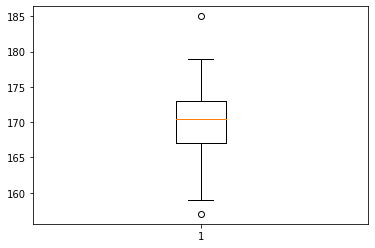

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([157, 159, 161, 164, 165, 166, 167, 167,
167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172,
172, 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])
print(f'mean={np.mean(x)}, median={np.median(x)}')

plt.boxplot(x)
plt.show()

## Нормальное распределение (Normal distribution)

mean=170.4, median=170.5


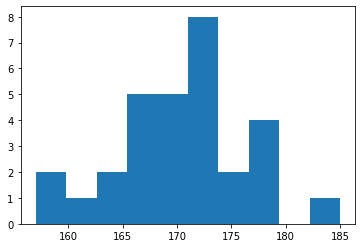

after standartization
mean=-0.00, median=0.02


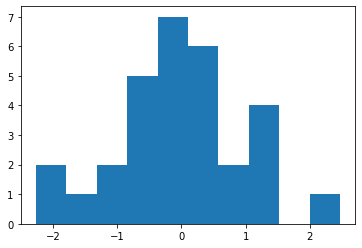

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([157, 159, 161, 164, 165, 166, 167, 167,
167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172,
172, 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])
print(f'mean={np.mean(x)}, median={np.median(x)}')
plt.hist(x)
plt.show()

#Стандартизация (z-преобразование)
print('after standartization')
x = (x - np.mean(x)) / np.std(x)
print(f'mean={np.mean(x):0.2f}, median={np.median(x):0.2f}')
plt.hist(x)
plt.show()

## Центральная предельная теорема (Central limit theorem)

Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100

In [ ]:
from math import sqrt

D = 4
n = 100

se = sqrt(D) / sqrt(n)
print(f'se={se}')

se=0.2


## Доверительные интервалы для среднего (confidence interval)

Если бы мы многократно извлекали выборки одинакового размера из генеральной совокупности, в каждой выборке рассчитывали среднее значение и для него свой 95%-ный доверительный интервал (т.е. mu+-1.96se), то в 95% всех случаев такой интервал включал бы в себя среднее значение генеральной совокупности
mu - среднее выборки
se - стандарная ошибка среднего (standard error)
Рассчитаем доверительный интервал для наших выборочных данных:

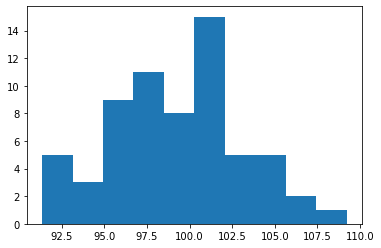

se=0.5
95%-ный доверительный интервал=(99.02, 100.98)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

mu, std, n = 100, 4, 64
x = np.random.normal(mu, std, n)
plt.hist(x)
plt.show() 

se = std /  sqrt(n)
print(f'se={se}')
print(f'95%-ный доверительный интервал={mu - 1.96 * se, mu + 1.96 * se}')

99% всех наблюдений лежит в диапазоне mu+-2.58sigma (se - для рассчета доверительных интервалов выборочных данных)

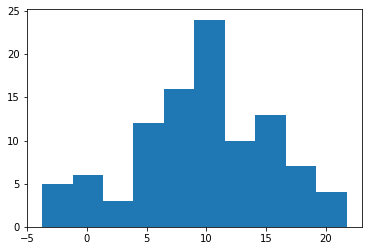

se=0.5
99%-ный доверительный интервал=(8.71, 11.29)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

mu, std, n = 10, 5, 100
x = np.random.normal(mu, std, n)
plt.hist(x)
plt.show() 

se = std /  sqrt(n)
print(f'se={se}')
print(f'99%-ный доверительный интервал={mu - 2.58 * se, mu + 2.58 * se}')

## Идея статистического вывода, p-уровень значимости (p-value)

Идея статистического вывода
Предположим, что для выздоровления от некоторого заболевания в среднем требуется 20 дней. Однако мы разработали препарат и хотим проверить, можно ли сократить этот срок. Мы набрали группу пациентов из 64 человек и опробовали на них новый метод лечения. Оказалось, что средний срок выздоровления сократился до 18,5 дней при стандартном отклонении 4. Нужно определить: это влияние нового препарата или случайность?

Давайте введём две конкурирующих гипотезы:
Нулевая гипотеза H0 будет говорить о том, что никакого влияния препарат не оказывает и среднее M=20
Альтернативная гипотеза H1 утверждает, что препарат сокращает время выздоровления и среднее M=18,5 дней

Предположим, что верна нулевая гипотеза. Тогда в соответствии с центральной предельной теоремой, если бы мы многократно повторяли наши исследования, то выборочные средние распределились нормальным образом вокруг среднего генеральной совокупности со стандартной ошибкой среднего se = std / sqrt(n)

In [ ]:
from math import sqrt

M, n, mu, std = 20, 64, 18.5, 4

se = std / sqrt(n)
print(f"se={se}")

se=0.5


Ответим на вопрос: на сколько наше выборочное среднее отклонилось от предполагаемого среднего генеральной совокупности в единицах стандартного отклонения (sigma)?
Для этого сделаем z-преобразование

In [ ]:
z = (mu - M) / se
print(f"z={z}")

z=-3.0


Это означает, что, если бы среднее ген совокупности (M) равнялось 20, то наше выборочное среднее (mu) отклонилось от M на -3*sigma

Воспользовавшись сервисом https://gallery.shinyapps.io/dist_calc/
установив 
mean=0, 
standard deviation = 1
both tails: a = -3, b = 3

Получим, что вероятность получить такое отклонение (3*sigma в обе стороны) P = 0.0027

Подведем итоги: на первом этапе мы предположили, что верно нулевая гипотеза. Если это так, то все выборочные средние распределились бы нормальным образом вокруг среднего ген совокупности (M=20). Но при этом вероятность получить наше выборочное среднее оказалась равно примерно 0.003.
Таким образом, основная идея статистического вывода заключается в следующем:

Сначала мы допускаем, что верна нулевая гипотеза (т.е. никаких различий и взаимосвязей в генеральной совокупности нет). После этого мы сможем рассчитывать, что мы получили такие или ещё более выраженные различия абсолютно случайно. Эта вероятность в статистике называется p-уровень значимости. С помощью этого показателя можно выбрать более состоятельную гипотезу. Чем меньше p-уровень значимости, тем больше у исследователя оснований отклонить нулевую гипотезу. Считается, если p<0.05, можно смело принимать альтернативную гипотезу. Однако, если p>0.05, считается, что у нас недостаточно оснований отклонить нулевую гипотезу

## Идея статистического вывода с помощью доверительных интервалов (p-value vs confidence interval)

Использование доверительных интервалов зачастую рассматривают, как альтернативный способ проверки гипотез. В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, у нас будет достаточно оснований отклонить нулевую гипотезу. Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.

n = 64,  sd = 4,   M = 18.5

In [ ]:
from math import sqrt

mu, std, n = 18.5, 4, 64

se = std /  sqrt(n)
print(f'se={se}')
print(f'95%-ный доверительный интервал={mu - 1.96 * se, mu + 1.96 * se}')

se=0.5
95%-ный доверительный интервал=(17.52, 19.48)


20 не принадлежит доверительному интервалу - отклоняем H0

# Сравнение средних

---
**ВАЖНАЯ ЗАМЕТКА:**

Если число наблюдений меньше 30, 
z-преобразование заменяется на t-преобразование.
Чем выше число наблюдений, тем ближе форма t-распределения к нормальному

---

## сравнение двух средних, t-критерий Стьюдента (Student's t-test)

Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от воздействующей на них температуры.

При сравнении двух видов были получены следующие значения температуры плавления образца:

In [ ]:
mu_1, std_1, n_1 = 89.9, 11.3, 20
mu_2, std_2, n_2 = 80.7, 11.7, 20

Предположим 2 гипотезы:

H0 - М1=М2, оба вида принадлежат одной генеральной совокупности

H1 - М1!=М2, оба вида принадлежат разным генеральным совокупностям

Проверяем H0: разница M0-M1 должна распределиться нормально с средним в нуле

Определим на сколько сигма отклоняется разница наших выборочных средних от разницы средних генеральных совокупностей (0):

In [ ]:
from math import sqrt

se = sqrt((std_1**2) / n_1 + (std_2**2) / n_2)
print(f'se = {se:.01f}')

t = (mu_1 - mu_2) / se
print(f't = {t:.01f}')
print(f'Degrees of freedom={n_1 + n_2 - 2}')

se = 3.6
t = 2.5
Degrees of freedom=38


Воспользовавшись сервисом https://gallery.shinyapps.io/dist_calc/ выбрав t-распределение и установив Degrees of freedom=38, both tails: a = -2.5, b = 2.5

получим p-value: P(X < -2.5 or X > 2.5) = 0.0169, что меньше 0,05

Ttest_indResult(statistic=6.04781958789892, pvalue=4.894702897415829e-07)
H0 can be rejected, means aren't statistically equal, factor impacts


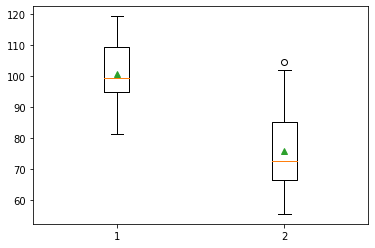

In [ ]:
# вариант с помощью scipy
from scipy import stats
import matplotlib.pyplot as plt

sample_1 = [84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5]
sample_2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5]

res = stats.ttest_ind(sample_1, sample_2)
print(res)
if res[1] >= 0.05:
    print("H0 can't be rejected, means are statistically equal, no factor impact")
else:
    print("H0 can be rejected, means aren't statistically equal, factor impacts")

plt.boxplot([sample_1, sample_2], showmeans=True, whis=True)
plt.show()

## Confidence interval and Student's t-test (2.2 step 12)

Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу mu +- 1.96 * std / sqrt(n)

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:

mu=89,9 sd=11,3 n=20 

Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96. 

Давайте воспользуемся таблицей критических значений для t - распределения для нахождения нужного t - значения ﻿:

http://www.medcalc.org/manual/t-distribution.php

В этой таблице нас интересует столбец, где A=0,95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

В соответствии с таблицей это число 2.093

In [ ]:
from math import sqrt

mu, std, n = 89.9, 11.3, 20
t = 2.093

se = std /  sqrt(n)
print(f'se={se:.2f}')
print(f'95%-ный доверительный интервал=[{mu - t * se:.2f}; {mu + t * se:.2f}]')

se=2.53
95%-ный доверительный интервал=[84.61; 95.19]


## QQ-Plot

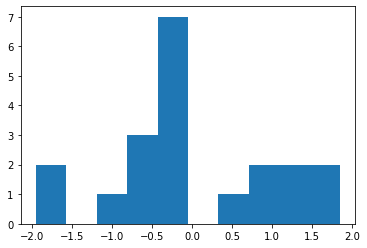

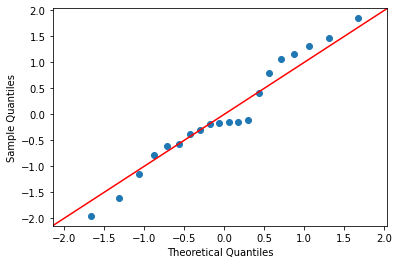

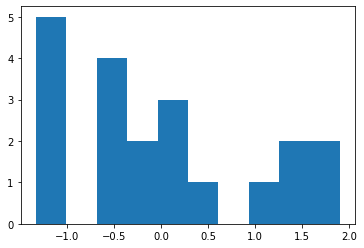

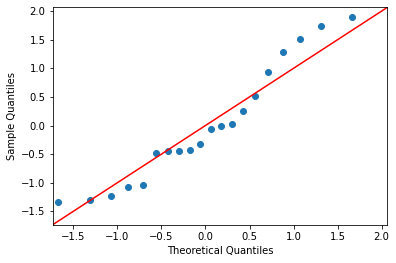

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

sample_1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
sample_2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102, 69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

for data in (sample_1, sample_2):
    data = (data - np.mean(data)) / np.std(data) # don't forget about standartization!!!
    plt.hist(data)
    fig = sm.qqplot(data, line='45')
    plt.show()

## Однофакторный дисперсионный анализ (One-way analysis of variance)

Возьмем 3 наблюдения
Определим 2 гипотезы:

H0: M1=M2=M3

H1: M1!=M2 or M2!=M3 or M1!=M3

In [3]:
import numpy as np

sample_1 = np.array([3, 1, 2])
sample_2 = np.array([5, 3, 4])
sample_3 = np.array([7, 6, 5])

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Рассчитаем среднее по всем выборкам
all_samples = np.append(sample_1, np.append(sample_2, sample_3))
n = len(all_samples)
m = 3 #num of groups
mean_all = np.mean(all_samples)
print(f"mean_all={mean_all}")

# SST - Total Sum of Squares (общая сумма квадратов): базовое понятие дисперсионного анализа
# Показывает, насколько высока изменчивость наших данных без учета разделения их на группы
SST = sum((all_samples-mean_all)**2)
print(f"SST={SST}")

# Число степеней свободы
df = n - 1
print(f"df={df}")

mean_all=4.0
SST=30.0
df=8


In [34]:
"""
 На SST влияют два параметра:
 1. SSB (sum of squares between groups)
 2. SSW (sum of squares within group)
"""
def SSW_in_group(sample):
    return sum((sample - np.mean(sample))**2)

SSW = SSW_in_group(sample_1) + SSW_in_group(sample_2) + SSW_in_group(sample_3)
print(f"SSW={SSW}")
df = n - m
print(f"df={df}")

n_1, n_2, n_3 = len(sample_1), len(sample_2), len(sample_3)
SSB = n_1*(np.mean(sample_1) - mean_all)**2 + n_2*(np.mean(sample_2) - mean_all)**2 + n_3*(np.mean(sample_3) - mean_all)**2
print(f"SSB={SSB}")
df = m - 1
print(f"df={df}")

SSW=6.0
df=6
SSB=24.0
df=2


Получаем

SST = 30

SSB = 24

SSW = 6

Вывод: если большая часть нашей общей изменчивости обеспечивается именно благодаря сумме квадратов междугрпповых, это означает, что наши группы значительно различаются между собой

Рассчитает основной статистический показатель дисперсионного анализа, F-значение

In [2]:
f_value = (SSB / (m-1)) / (SSW / (n-m))
print(f"f_value={f_value}")

NameError: name 'SSB' is not defined

Воспользовавшись сайтом https://gallery.shinyapps.io/dist_calc/ выясняем(выбераем F distribution, Degrees of freedom=2, Degrees of freedom (2)=6, a=12), что вероятность получить такие или более выраженные различия равны (p-уровень значимости) P(X > 12) = 0.008

### Пример

In [1]:
from scipy import stats
import pandas as pd

data = pd.read_csv("genetherapy.csv")
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A
